In [10]:
import sys
import os
script_dir = os.getcwd() # coleata o diretorio do projeto atual
sys.path.append(script_dir)

In [60]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt

from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras import layers, models

In [12]:
def load_data_base(local_base):

    data = []
    subdirectory_classes = [(directory.path, directory.name) for directory in os.scandir(local_base) if directory.is_dir()]
    for x in subdirectory_classes:  
        print(x)
    print(len(subdirectory_classes))

    for directory, label in subdirectory_classes:
        class_images = []
        files = os.listdir(directory)    

        for file in files:
            image_path = os.path.join(directory, file)
            image = cv2.imread(image_path)

            if image is not None:
                class_images.append((image, label))
            else:
                print(f"Erro ao carregar a imagem: {image_path}")
                
        data.append(class_images)

    return data

In [13]:
def contar_imagens_por_pasta(list_class):
    dados = []

    for class_type in list_class:
        classe = class_type[0][1]
       
        dados.append({'Classe': classe, 'Número de Imagens': len(class_type)})

    # Cria um DataFrame com os dados
    df = pd.DataFrame(dados)
    # Ordena o DataFrame pela classe
    df = df.sort_values(by='Classe').reset_index(drop=True)
    
    return df

In [14]:
def split_train_test(data, test_size=0.2):
    train_data = []
    test_data = []

    for class_images in data:
        # Separar as imagens e suas etiquetas
        images, labels = zip(*class_images)
        # Dividir os dados em conjuntos de treinamento e teste
        train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=test_size, random_state=42)
        # Adicionar os conjuntos de treinamento e teste às respectivas listas
        train_data.append(list(zip(train_images, train_labels)))
        test_data.append(list(zip(test_images, test_labels)))

    return train_data, test_data

In [15]:
dir_base_img = script_dir + r'\data'
data_base = load_data_base(dir_base_img)

('c:\\Faculdade\\Repositorios\\Repositorio_Academico_Multidisciplinar\\Processamento_imagens\\aula04\\data\\airplane', 'airplane')
('c:\\Faculdade\\Repositorios\\Repositorio_Academico_Multidisciplinar\\Processamento_imagens\\aula04\\data\\car', 'car')
('c:\\Faculdade\\Repositorios\\Repositorio_Academico_Multidisciplinar\\Processamento_imagens\\aula04\\data\\cat', 'cat')
('c:\\Faculdade\\Repositorios\\Repositorio_Academico_Multidisciplinar\\Processamento_imagens\\aula04\\data\\dog', 'dog')
('c:\\Faculdade\\Repositorios\\Repositorio_Academico_Multidisciplinar\\Processamento_imagens\\aula04\\data\\flower', 'flower')
('c:\\Faculdade\\Repositorios\\Repositorio_Academico_Multidisciplinar\\Processamento_imagens\\aula04\\data\\fruit', 'fruit')
('c:\\Faculdade\\Repositorios\\Repositorio_Academico_Multidisciplinar\\Processamento_imagens\\aula04\\data\\motorbike', 'motorbike')
('c:\\Faculdade\\Repositorios\\Repositorio_Academico_Multidisciplinar\\Processamento_imagens\\aula04\\data\\person', 'per

In [16]:
print(len(data_base[0]))

727


In [17]:
train_data, test_data = split_train_test(data_base, 0.2)
contar_imagens_por_pasta(train_data)

,Classe,Número de Imagens
0,airplane,581
1,car,774
2,cat,708
3,dog,561
4,flower,674
5,fruit,800
6,motorbike,630
7,person,788


In [18]:
contar_imagens_por_pasta(test_data)

,Classe,Número de Imagens
0,airplane,146
1,car,194
2,cat,177
3,dog,141
4,flower,169
5,fruit,200
6,motorbike,158
7,person,198


In [23]:
def extract_histoI_gray(set_data):
    images = []
    labels = []
    for data in set_data:
        for image_label in data:
            images.append(cv2.calcHist([image_label[0]], [0], None, [256], [0,256]))
            labels.append(image_label[1])

    return images, labels

In [24]:
train_data, train_label = extract_histoI_gray(train_data)
test_data, test_label = extract_histoI_gray(test_data)

In [53]:
print(len(train_data))
print(len(test_data))

5516
1383


In [49]:
def plot_histograma(histograma):
    # Plotar o histograma
    plt.plot(histograma, color='black')
    plt.xlabel('Tons de Cinza')
    plt.ylabel('Número de Pixels')
    plt.title('Histograma em Tons de Cinza')
    plt.show()

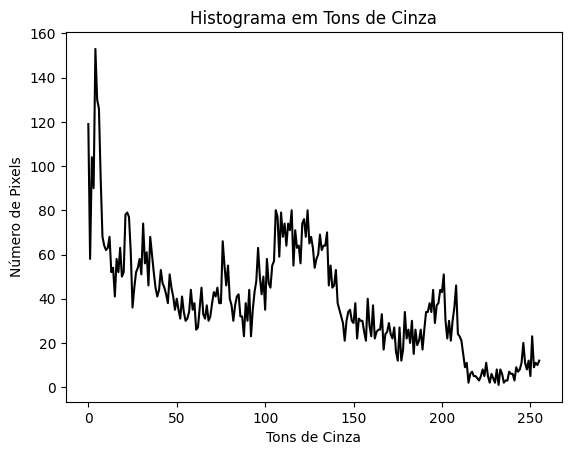

Label: car


In [57]:
imagem = 1050
plot_histograma(train_data[imagem])
print(f"Label: {train_label[imagem]}")

In [62]:

def preparar_dados(labels):
    # Converter rótulos de strings para valores numéricos
    encoder = LabelEncoder()
    encoder.fit(labels)
    labels_codificados = encoder.transform(labels)

    # Converter rótulos numéricos para vetores one-hot
    labels_one_hot = to_categorical(labels_codificados)

    return labels_one_hot

In [66]:
label = preparar_dados(train_label)
print(len(label))

5516


In [19]:
def create_model(input_dim, output_dim, dense_layers):
    
    model = models.Sequential()
    model.add(layers.Dense(dense_layers[0], activation='relu', input_shape=(input_dim,)))

    for neurons in dense_layers[1:]:
        model.add(layers.Dense(neurons, activation='relu'))

    model.add(layers.Dense(output_dim, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Compilar o modelo
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [20]:
# Exemplo de uso
input_dim = 256
output_dim = 10  # Suponha que temos 10 classes de saída
dense_layers = [128, 10]  # Dois layers densos com 128 e 64 neurônios, respectivamente

model = create_model(input_dim, output_dim, dense_layers)

c:\Users\vinic\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,296 (133.97 KB)

 Trainable params: 34,296 (133.97 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
import numpy as np

def train_model(model, train_data, train_label, test_data, test_label, epochs=10, batch_size=32):
    model.fit(train_data, train_label, epochs=epochs, batch_size=batch_size)
    return model

In [ ]:

    
# Exemplo de uso
model = create_model(input_dim, output_dim, dense_layers)
model = train_model(model, train_data, train_label, test_data, test_label)